### Univariate Sampling Techniques

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def view_distribution(samples, ax):
    weights = np.ones_like(samples) / len(samples)
    ax.hist(samples, bins=30, color="gray", linewidth=0.5, alpha=0.7, density=True, weights=weights)

def compute_mean(samples):
    return samples.sum(axis=-1) / len(samples)

def compute_std(samples):
    return np.sqrt((samples**2).sum(axis=-1) / len(samples) - compute_mean(samples)**2)

def plot_estimate_distribution(samples, ax, n: int, kernel):
    sigma = compute_std(samples)
    # h = sigma**2 / n**(1/5)
    h = 0.9 * sigma**2 * n**(-0.2)

    margin = (samples.max() - samples.min()) * 0.1
    x = np.linspace(samples.min()-margin, samples.max()+margin, n)
    density = np.zeros(len(x))
    for xi in samples:
        density += kernel((x-xi) / h)
    density /= n*h
    ax.plot(x, density)
    return density

**Box-Muller Method**

Sampling $X \sim \mathcal{N}(0,1)$

Box-Muller Method:
1. Draw $r$ from $\mathcal{U}(0,1)$
2. Draw $\theta$ from $\mathcal{U}(0,1)$
3. Return $x=\sqrt{-2\log r}\cos(2\pi \theta)$

In [4]:
def standard_normal_distribution(n: int):
    def box_muller():
        r = np.random.random()
        theta = np.random.random()
        return np.sqrt(-2 * np.log(r)) * np.cos(2*np.pi * theta)
    return np.array([box_muller() for _ in range(n)])

mean: -0.018435, sigma: 0.989988


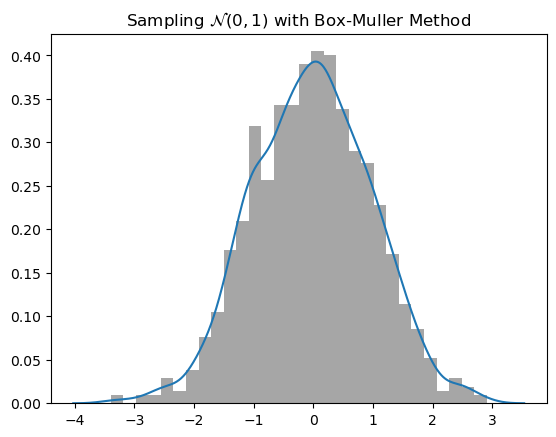

In [5]:
n = 1000
x = standard_normal_distribution(n)
mean = compute_mean(x)
sigma = compute_std(x)
print("mean: %f, sigma: %f" % (mean, sigma))

fig, ax = plt.subplots()
view_distribution(x, ax)
kernel = lambda t: np.exp(-t**2 / 2) / np.sqrt(2*np.pi)
plot_estimate_distribution(samples=x, ax=ax, n=1000, kernel=kernel)
ax.set_title(r"Sampling $\mathcal{N}(0,1)$ with Box-Muller Method")
plt.show()

Sampling $X \sim \mathcal{N}(\mu,\sigma ^2)$

1. Draw y from $\mathcal{N}(0,1)$
2. Return $x=\mu + \sigma y$

In [6]:
def normal_distribution(mean: float, std: float, n: int):
    y = standard_normal_distribution(n)
    return mean + std * y


mean: 1.229715, sigma: 1.753588


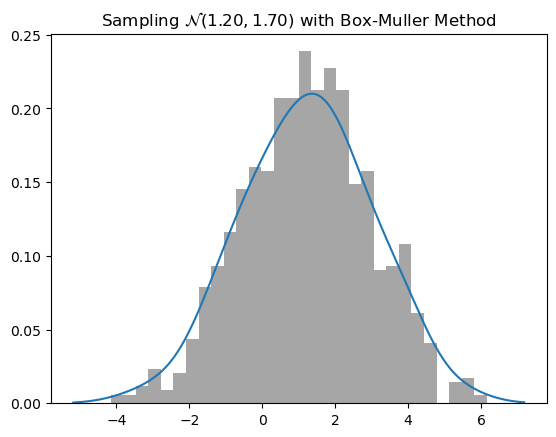

In [7]:
n = 1000
mean = 1.2
sigma = 1.7
x = normal_distribution(mean=mean, std=sigma, n=n)
print("mean: %f, sigma: %f" % (compute_mean(x), compute_std(x)))

fig, ax = plt.subplots()
view_distribution(x, ax)
kernel = lambda t: np.exp(-t**2 / 2) / np.sqrt(2*np.pi)
plot_estimate_distribution(samples=x, ax=ax, n=1000, kernel=kernel)
ax.set_title(r"Sampling $\mathcal{N}(%.2f,%.2f)$ with Box-Muller Method" % (mean, sigma))
plt.show()

Sampling $X \sim \mathcal{N}(\mu,\Sigma)$

1. Compute Cholesky-factorization: $\Sigma=C^TC$
2. Build $y=(y_1,...,y_n)$ with with $\mu \in \mathbb{R}^n$ and $y_i$ drawned from $\mathcal{N}(0,1)$
2. Return $x=\mu + Cy$

In [8]:
def multuivariate_normal_distribution(mean: np.ndarray, sigma: np.ndarray, n: int):
    assert sigma.shape[0] == sigma.shape[1] == mean.shape[0]
    L = np.linalg.cholesky(sigma)
    def draw():
        y = standard_normal_distribution(len(mean)).reshape(-1,1)
        return mean.reshape(-1,1) + L@y
    return np.hstack([draw() for _ in range(n)])

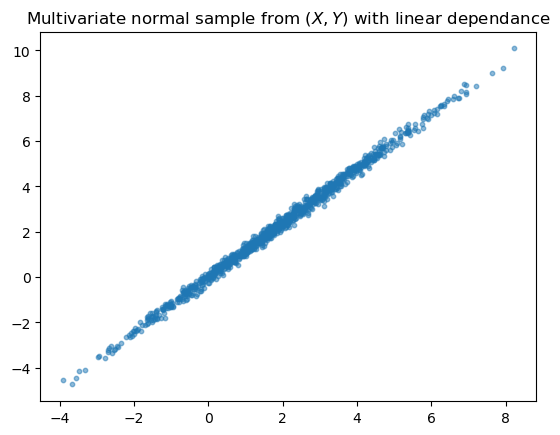

In [9]:
n = 1000
coef = 1.2
# bias = -0.7
mean_x = 2
var_x = 4
mean = np.array([mean_x, mean_x*coef])
sigma = np.array([[var_x, coef*var_x], [coef*var_x, coef**2*var_x]])

x = multuivariate_normal_distribution(mean=mean, sigma=sigma, n=n)
noise = 0.1 * multuivariate_normal_distribution(mean=np.array([0, 0]), sigma=np.eye(2), n=n)
x += noise

fig, ax = plt.subplots()
ax.scatter(x[0, :], x[1, :], alpha=0.5, s=10)
ax.set_title(r"Multivariate normal sample from $(X,Y)$ with linear dependance")
plt.show()